In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
import os
path_to_src = os.path.join('../', 'src')
sys.path.insert(0, path_to_src)
from functions import *
%matplotlib inline

In [13]:
def visualize_training_results(history, iteration):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['recall_{}'.format(iteration)])
    ax1.plot(history.history['val_recall_{}'.format(iteration)])
    ax1.set_ylabel('Recall')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    ax3.plot(history.history['precision_{}'.format(iteration)])
    ax3.plot(history.history['val_precision_{}'.format(iteration)])
    ax3.set_ylabel('Precision')
    ax3.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()
    

In [14]:
data_dir_train = '../data/train/'
data_dir_test = '../data/test/'
categories = ['NORMAL', 'PNEUMONIA']

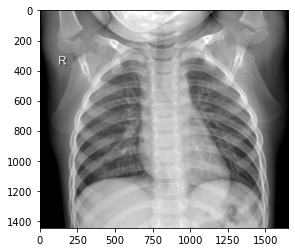

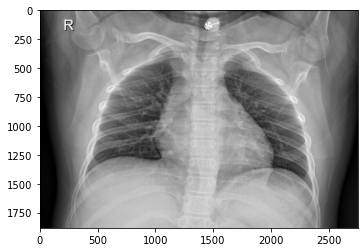

In [15]:
for category in categories:
    path_train = os.path.join(data_dir_train,category)
    path_test = os.path.join(data_dir_test,category)
    for img in os.listdir(path_train):
        img_array_train = cv2.imread(os.path.join(path_train,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array_train, cmap="gray")
        plt.show()
        break
    for img in os.listdir(path_test):
        img_array_test = cv2.imread(os.path.join(path_test,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array_test, cmap="gray")
        plt.show()
        break
    break

In [16]:
print(img_array_train.shape)
print(img_array_test.shape)

(1446, 1654)
(1882, 2752)


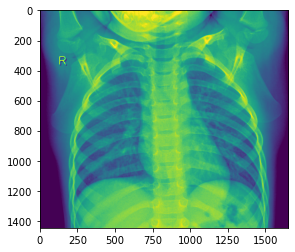

In [17]:
plt.imshow(img_array_train)
plt.show()

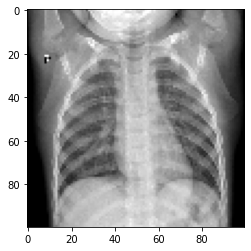

In [18]:
img_size = 100
new_array = cv2.resize(img_array_train,(img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [19]:
train_data = []

In [21]:
def create_training_data():
    for category in categories:
        path_train = os.path.join(data_dir_train,category)
        class_num = categories.index(category)
        for img in os.listdir(path_train):
            try:
                img_array_train = cv2.imread(os.path.join(path_train,img), cv2.IMREAD_GRAYSCALE)
                train_array = cv2.resize(img_array_train,(img_size, img_size))
                train_data.append([train_array, class_num])
            except Exception as e:
                pass

In [23]:
create_training_data()

In [24]:
print(len(train_data))

10464


In [25]:
random.shuffle(train_data)

In [26]:
for sample in train_data:
    print(sample[1:])

[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]


[0]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]


[0]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]


In [27]:
X = []
y = []

In [28]:
for features, label in train_data:
    X.append(features)
    y.append(label)

In [29]:
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [30]:
X = X/255.0

In [31]:
X.shape

(10464, 100, 100, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [33]:
X_train.shape

(7848, 100, 100, 1)

In [34]:
num_classes = 2

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [35]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7848, 100, 100, 1)
(7848, 2)
(2616, 100, 100, 1)
(2616, 2)


In [37]:
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

7848 train samples
2616 test samples


In [38]:
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (7848, 100, 100, 1)
7848 train samples
2616 test samples


In [39]:
base_line = Sequential()
base_line.add(Conv2D(32, kernel_size= 5, activation='relu', padding='same', input_shape=(100, 100, 1)))
base_line.add(MaxPooling2D(2,2))
base_line.add(Flatten())
base_line.add(Dense(16, activation='relu'))
base_line.add(Dense(2, activation='sigmoid'))

In [40]:
base_line.compile(loss="binary_crossentropy", optimizer="adam", metrics = [Precision(), Recall()])
# metrics = [precision, recall]

In [41]:
base_line.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1280016   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 1,280,882
Trainable params: 1,280,882
Non-trainable params: 0
_________________________________________________________________


In [42]:
start = time.time()
history_baseline = base_line.fit(X_train,
                      y_train,
                      batch_size = 32,
                      epochs = 5,
                      validation_data= (X_test,y_test))
end = time.time()
print(end-start)

Train on 7848 samples, validate on 2616 samples
Epoch 1/5
7848/7848 [==============================] - 35s 5ms/step - loss: 0.2478 - precision_1: 0.8402 - recall_1: 0.9330 - val_loss: 0.1094 - val_precision_1: 0.9619 - val_recall_1: 0.9652
Epoch 2/5
7848/7848 [==============================] - 36s 5ms/step - loss: 0.0916 - precision_1: 0.9653 - recall_1: 0.9690 - val_loss: 0.0824 - val_precision_1: 0.9692 - val_recall_1: 0.9740
Epoch 3/5
7848/7848 [==============================] - 37s 5ms/step - loss: 0.0579 - precision_1: 0.9787 - recall_1: 0.9794 - val_loss: 0.0716 - val_precision_1: 0.9737 - val_recall_1: 0.9748
Epoch 4/5
7848/7848 [==============================] - 37s 5ms/step - loss: 0.0488 - precision_1: 0.9813 - recall_1: 0.9819 - val_loss: 0.0726 - val_precision_1: 0.9751 - val_recall_1: 0.9740
Epoch 5/5
7848/7848 [==============================] - 37s 5ms/step - loss: 0.0336 - precision_1: 0.9884 - recall_1: 0.9881 - val_loss: 0.0502 - val_precision_1: 0.9836 - val_recall_1:

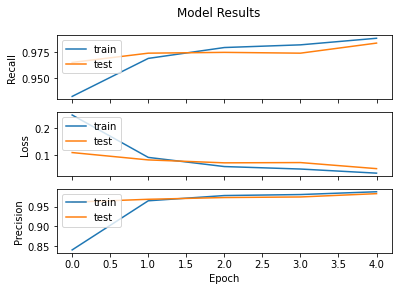

In [44]:
visualize_training_results(history_baseline,1)

In [45]:
results_train = base_line.evaluate(X_train, y_train)
results_test = base_line.evaluate(X_test, y_test)

2616/2616 [==============================] - 2s 574us/step


In [46]:
print(results_train)
print(results_test)

[0.020448345650617834, 0.9960489273071289, 0.9957951307296753]
[0.05023180910554182, 0.983562707901001, 0.983562707901001]


In [47]:
model_2 = Sequential()
# model_2.add()
model_2.add(Conv2D(64, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (100,100,1)))
model_2.add(MaxPooling2D(4,4))
model_2.add(Flatten())
model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(2, activation = 'sigmoid'))

In [48]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [Precision(), Recall()])
# metrics = [precision, recall]

In [49]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 64)      1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2560064   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 2,561,858
Trainable params: 2,561,858
Non-trainable params: 0
_________________________________________________________________


In [50]:
start = time.time()
history_model_2 = model_2.fit(X_train,
                              y_train,
                              batch_size = 32,
                              epochs = 5,
                              validation_data = (X_test,y_test))
end = time.time()
print(end-start)

Train on 7848 samples, validate on 2616 samples
Epoch 1/5
7848/7848 [==============================] - 62s 8ms/step - loss: 0.2153 - precision_2: 0.9082 - recall_2: 0.9090 - val_loss: 0.1011 - val_precision_2: 0.9641 - val_recall_2: 0.9644
Epoch 2/5
7848/7848 [==============================] - 62s 8ms/step - loss: 0.0779 - precision_2: 0.9716 - recall_2: 0.9716 - val_loss: 0.0814 - val_precision_2: 0.9672 - val_recall_2: 0.9702
Epoch 3/5
7848/7848 [==============================] - 62s 8ms/step - loss: 0.0619 - precision_2: 0.9780 - recall_2: 0.9787 - val_loss: 0.0767 - val_precision_2: 0.9740 - val_recall_2: 0.9732
Epoch 4/5
7848/7848 [==============================] - 63s 8ms/step - loss: 0.0497 - precision_2: 0.9813 - recall_2: 0.9824 - val_loss: 0.0641 - val_precision_2: 0.9752 - val_recall_2: 0.9759
Epoch 5/5
7848/7848 [==============================] - 64s 8ms/step - loss: 0.0315 - precision_2: 0.9893 - recall_2: 0.9894 - val_loss: 0.0833 - val_precision_2: 0.9684 - val_recall_2:

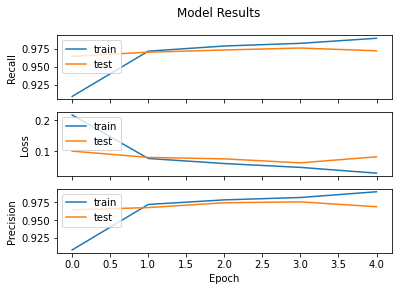

In [52]:
visualize_training_results(history_model_2, 2)

In [57]:
model_3 = Sequential()
model_3.add(Conv2D(128, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (100,100,1)))
model_3.add(Dense(64, activation = 'tanh'))
model_3.add(MaxPooling2D(4,4))
model_3.add(Flatten())
model_3.add(Dense(32, activation = 'relu'))
model_3.add(Dense(16, activation = 'sigmoid'))
model_3.add(Dense(2, activation = 'sigmoid'))

In [58]:
model_3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [Precision(), Recall()])

In [59]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 128)     3328      
_________________________________________________________________
dense_9 (Dense)              (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1280032   
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                

In [60]:
start = time.time()
history_model_3 = model_3.fit(X_train,
                              y_train,
                              batch_size= 32,
                              epochs = 7,
                             validation_data = (X_test, y_test))

end = time.time()
print(end - start)

Train on 7848 samples, validate on 2616 samples
Epoch 1/7
7848/7848 [==============================] - 164s 21ms/step - loss: 0.5683 - precision_4: 0.7366 - recall_4: 0.7332 - val_loss: 0.5549 - val_precision_4: 0.7439 - val_recall_4: 0.7439
Epoch 2/7
7848/7848 [==============================] - 165s 21ms/step - loss: 0.4025 - precision_4: 0.8625 - recall_4: 0.8389 - val_loss: 0.2354 - val_precision_4: 0.9666 - val_recall_4: 0.9507
Epoch 3/7
7848/7848 [==============================] - 167s 21ms/step - loss: 0.1829 - precision_4: 0.9665 - recall_4: 0.9602 - val_loss: 0.1616 - val_precision_4: 0.9595 - val_recall_4: 0.9511
Epoch 4/7
7848/7848 [==============================] - 165s 21ms/step - loss: 0.1263 - precision_4: 0.9719 - recall_4: 0.9684 - val_loss: 0.1302 - val_precision_4: 0.9510 - val_recall_4: 0.9637
Epoch 5/7
7848/7848 [==============================] - 166s 21ms/step - loss: 0.0927 - precision_4: 0.9797 - recall_4: 0.9774 - val_loss: 0.0952 - val_precision_4: 0.9743 - val

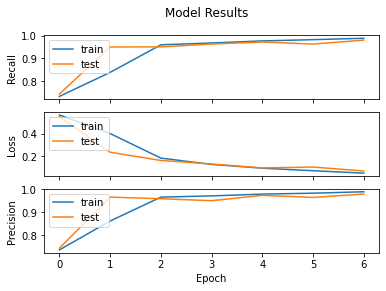

In [61]:
visualize_training_results(history_model_3, 4)

In [65]:
model_4 = Sequential()
model_4.add(Conv2D(128, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (100,100,1)))
model_4.add(Dense(64, activation = 'tanh'))
model_4.add(MaxPooling2D(4,4))
model_4.add(Flatten())
model_4.add(Dense(32, activation = 'relu'))
model_4.add(Dense(16, activation = 'sigmoid'))
model_4.add(Dense(8, activation = 'relu'))
model_4.add(Dense(2, activation = 'sigmoid'))

In [66]:
model_4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [Precision(), Recall()])

In [67]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 128)     3328      
_________________________________________________________________
dense_18 (Dense)             (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1280032   
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                

In [68]:
history_model_4 = model_4.fit(X_train,
                              y_train,
                              batch_size = 64,
                              epochs = 10,
                              validation_data = (X_test, y_test))

Train on 7848 samples, validate on 2616 samples
Epoch 1/10
7848/7848 [==============================] - 142s 18ms/step - loss: 0.3960 - precision_7: 0.7565 - recall_7: 0.8233 - val_loss: 0.2787 - val_precision_7: 0.8518 - val_recall_7: 0.9385
Epoch 2/10
7848/7848 [==============================] - 146s 19ms/step - loss: 0.1759 - precision_7: 0.9534 - recall_7: 0.9647 - val_loss: 0.1517 - val_precision_7: 0.9435 - val_recall_7: 0.9515
Epoch 3/10
7848/7848 [==============================] - 149s 19ms/step - loss: 0.1039 - precision_7: 0.9681 - recall_7: 0.9660 - val_loss: 0.1117 - val_precision_7: 0.9652 - val_recall_7: 0.9637
Epoch 4/10
7848/7848 [==============================] - 151s 19ms/step - loss: 0.0834 - precision_7: 0.9727 - recall_7: 0.9708 - val_loss: 0.0866 - val_precision_7: 0.9736 - val_recall_7: 0.9732
Epoch 5/10
7848/7848 [==============================] - 151s 19ms/step - loss: 0.0559 - precision_7: 0.9823 - recall_7: 0.9810 - val_loss: 0.0700 - val_precision_7: 0.9797 

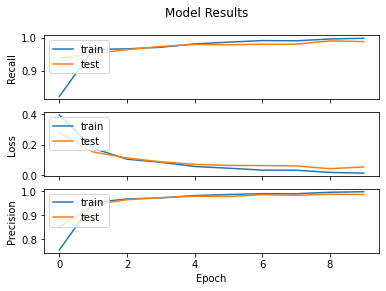

In [69]:
visualize_training_results(history_model_4, 7)

In [72]:
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.3.1


In [73]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [76]:
preds = model_4.predict(X_train)
for x in decode_predictions(preds)[0]:
    print(x)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (7848, 2)